## assumption

**Assumes:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;no missing events (adding liquidity and removing liquidity)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;events are *all* denominated in ROWAN<br>
**Default setting:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*can be modified in `getUserAccReward()`*<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;duration of mining: 121 days<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;total reward in ROWAN: 30 million<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;duration per epoch: 200 minutes<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;time to reach max multiplier: 121 days<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(linear) multiplier band: from 1x to 4x<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Geyser: enabled<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;data route: `data['data']['snapshots_new'][0]['snapshot_data']` for LM, `data['data']['snapshots_validators'][0]['snapshot_data']` for VS

In [1]:
from platform import python_version
print(f'Python verion: {python_version()}')

Python verion: 3.7.7


## demonstration - LM

In [2]:
filename = 'data.json'

In [3]:
# pull data
import json
with open(filename, 'r') as f:
    data = json.load(f)
del json
addressList = list(data['data']['snapshots_new'][0]['snapshot_data'])
globalReward = 0

In [4]:
# import the blackbox function
from utils import getUserAccReward

```getUserAccReward(data, address, isValidator=False, hasPoolBalance)```<br>
**returns:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;claimable: reward already set aside for the user, ready to be claimed any time (in ROWAN)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;accumulated: user's accumulated *unclaimed* reward (in ROWAN)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;currentMultiplier: user's current multiplier

In [5]:
print(f'{"Address":<48}{"Claimable":<16}{"Accumulated":<15}{"Multiplier":<0}')
for address in addressList:
    claimable, accumulated, currentMultiplier = getUserAccReward(data, address)
    print(f'{address}: {claimable:>10.2f} rowan, {accumulated:>10.2f} rowan, {currentMultiplier:.2f}x')
    globalReward += claimable + accumulated

Address                                         Claimable       Accumulated    Multiplier
sif16j3khl59puquy5hksth98xrk8dzakp84v55mm4:      26.77 rowan,       0.00 rowan, 0.00x
sif13hqcdgn7q26pcthye5j5u4mkj0mj09d3x7menr:       0.00 rowan,       3.70 rowan, 1.64x
sif1jen0428qnnh774jpn2r9f0mv8tzjue8hc2ukp3:      31.54 rowan,       2.68 rowan, 1.20x
sif1nlqqr7kfz8cfcc4tjpema44fmpp6xx7hf0fa7f:      37.36 rowan,       8.84 rowan, 1.31x
sif12zhwz792d8zpxj3wmz05c7k9meea6q0xf5mj3w:      31.23 rowan,      26.66 rowan, 1.58x
sif1dajprj8cylnlmu3p0q2778hsvwfl4ahx65lusc:       0.00 rowan,     653.26 rowan, 2.30x
sif14gndet3zmzrdk4u4rxh2ea2c09huvlyjts2s2c:       0.01 rowan,       0.00 rowan, 0.00x
sif1jm03c2yqy0xr0pfejs2k5ygr5lf88pxwjyfkyw:       0.01 rowan,       0.00 rowan, 0.00x
sif1kxf966zsxeqj3vn7jds3te4a8lt8z709naaunl:       2.54 rowan,       0.00 rowan, 0.00x
sif1l9lfvvrlxher7ew2hjn35hncmj3pm3nm8dyxj9:       0.00 rowan,      50.71 rowan, 1.63x
sif1yjnd5g3dxnzsa0fw4xjlnzdxtrlzg9pcwudd72:       

sif1z4mpedp09nl8cc8xllr9uwp9sra7mkvqucnmp6:       0.00 rowan,      33.43 rowan, 2.15x
sif1uqmm6avrj0c0u4rurz3xlxdefzmamy8342qky0:      92.13 rowan,       4.58 rowan, 1.60x
sif1xw9up9qesn4s7jf3ar8jlhexv4h8qgddfvdlfd:       0.00 rowan,     600.03 rowan, 1.90x
sif1zx6secyr0gampkk7vna6l57walw0ps9jcplyq5:       3.16 rowan,      13.80 rowan, 1.79x
sif10f743f8p3ry7w77cget3p0085v5w56sap95tyg:       0.00 rowan,       0.01 rowan, 2.17x
sif1lhstxu3k5k2n0gg6dlnz8ylhu5xn3gggxqtx0q:       0.00 rowan,     123.33 rowan, 2.35x
sif1j9j8e63u225dg4sv7l7yf5fx3vphqy47yz0p40:       0.03 rowan,       3.13 rowan, 1.75x
sif133n9920r7t48dpcvsls5ww4kcwtnuqevc7m2ka:       0.00 rowan,      69.97 rowan, 1.35x
sif12da8p9zf88nt9df9uwcwnn56mjvydvnrgkuetl:       0.71 rowan,       0.48 rowan, 1.38x
sif1dq0ewtvgzm93st059ndpptnfz30whxplv6w3j9:      39.51 rowan,       0.00 rowan, 0.00x
sif18ajc7euypp0f79eak6q3yutw33ge5y8s7yg7z8:      18.45 rowan,      13.02 rowan, 1.61x
sif1tzr0pp65c7p6dc2xungt8vjmm8kg7twxkw9z77:       0.99

sif1ym853mxulc76h0a2t8d8t90p4r4m46263a843h:       0.00 rowan,     669.72 rowan, 2.24x
sif1sqj4m30097ha5gsdkdrykxe4j8vr3zqj3h9spl:      32.64 rowan,       0.00 rowan, 0.00x
sif196y49tpkamvr5zweq68hwgu9hx4ak727p3va22:      26.60 rowan,      23.59 rowan, 1.79x
sif14fyd28wucuhe6csyy26xecpmvquwak9ld5rr85:      13.80 rowan,       0.00 rowan, 0.00x
sif1uytvxkpflljpmvry4gmadxx4dfzy4f3dlac3l6:       0.00 rowan,       1.04 rowan, 1.21x
sif1haed76nlw2f9p6yl3rchyue2regjx063jve9z7:       1.16 rowan,       0.03 rowan, 1.01x
sif1z8mlsd42eaguaqf5gexy5a7jxgpwpgvzrtm8c8:       0.19 rowan,       0.00 rowan, 0.00x
sif1x9lptxjsk94e5dx2gsrq3uu4lzg20q43dzdslz:      47.38 rowan,      91.98 rowan, 1.72x
sif184d479nrj95rscydysgezslhegt0jgskps448h:       1.96 rowan,       0.00 rowan, 0.00x
sif1jzukjeumyqaxdjw7mq23z30qqpttn5xnvqxn50:       0.00 rowan,       0.02 rowan, 1.37x
sif1ptdqr6wpf78zyk2m2c4aq7hqaexv8l8wfe06h9:      10.54 rowan,       0.79 rowan, 1.48x
sif166cy7zw8xmxv6hhgmtrgzcjme35usp6u8pehmz:       0.00

sif1zh5mrc9rvdlvta6a5mdaajh0ywpp5klz692lw0:       0.00 rowan,    1181.40 rowan, 2.25x
sif1894wx6z58gwm3hk6278mhfx9jppc2k9xwpnsm8:       0.28 rowan,       0.00 rowan, 0.00x
sif1qzp0p8tyz00eq8h6qwfnt3e3zzzmnemceq9uc0:      36.73 rowan,    1877.96 rowan, 2.16x
sif1k8gnykrwv6ewn027823z82hvum0utyrx6wzk3j:       0.00 rowan,      31.50 rowan, 1.82x
sif18r72flynzn768us36dygfn6c6dn7gtmfqqdfjp:       0.00 rowan,      57.93 rowan, 1.77x
sif19dnv08hphtuj5dt7d0c785ukplrad94kv4gad0:       3.77 rowan,       0.00 rowan, 0.00x
sif1hj895sr8w64ye5jy6xkma6pv5ktrws249yv6vk:      18.19 rowan,       0.51 rowan, 1.39x
sif1gm6rdjj5uyrwlk5akur3c4mf6ggxcgnv229cu8:       0.96 rowan,       4.80 rowan, 1.69x
sif1lvuyxm4adeh7kt83nhhgkwckcel6l507uctylg:     126.89 rowan,      90.87 rowan, 1.79x
sif14cegm25ptndyvydlgqafhgq3wkmeg9fvwpguxm:       0.18 rowan,       0.00 rowan, 0.00x
sif1m9dwd037y7ma059xsnzwey92xk3v8jmye369pr:       0.00 rowan,       0.00 rowan, 0.00x
sif1685ud2uzvuvl6katpr9e8lgfps7ymf58gt3mkv:       0.00

sif1yntu5zpzav6wg03gdqh53v7xdfg3py7tgz7xup:     123.81 rowan,       0.00 rowan, 0.00x
sif1l9wklxlr0rm3yxfh87m82kfcr5dwqywzfk58ae:       0.00 rowan,       8.86 rowan, 1.14x
sif1jy7gk5vw0wxvgnd6e9znlt7efyzzpzwcxa5q6e:       0.00 rowan,       0.21 rowan, 1.11x
sif1s3zweq6jhxf072zmnwa536qzcyvlc30rynfd02:       0.00 rowan,       4.09 rowan, 1.53x
sif14tnl7nygu3zqe4yvxklmfaqa580a2a7qzu5vad:       0.00 rowan,      41.08 rowan, 2.22x
sif133t8m00w7llsslnf05zdhehharntly8dxv6vpt:      32.80 rowan,   24019.96 rowan, 2.32x
sif1z5wypn5dxgth8c99v6pfnd3e727kqhczv4s2v3:       0.00 rowan,       0.41 rowan, 1.19x
sif139uxveu486g48ga6c75mnajazyyvna4tex7vq9:     189.67 rowan,     304.46 rowan, 1.69x
sif14df654lagmuypm7zgq9rc86d4z6p6n5kwlr6c9:       0.49 rowan,      10.61 rowan, 1.73x
sif18kvelylx032egsc3nc7eyfk9v55gnccd2wz9v7:       0.00 rowan,      42.04 rowan, 2.34x
sif1qmfw2frczzedddr8agrn7pjvnqsqps05m579ae:       5.99 rowan,       0.00 rowan, 0.00x
sif1n5flpdy8zkdahru6rqtj26cf63h2cgszx4apkk:       0.00

sif1yqp3z7ejccytu2v6f0t8efpj448e0cjqp208gt:       0.00 rowan,    1223.74 rowan, 2.26x
sif16rdz65c90mz9ewvf65vjqtm3zk3dj96vvetsfx:      40.20 rowan,       1.99 rowan, 1.50x
sif1zca529sff7x4sm2t06x4a5stl7ug0xqx9ta7t7:      96.87 rowan,      84.44 rowan, 1.76x
sif1g6maxlwt25hrxwnh9gyrqnmwvs9tlkela93yzw:       0.00 rowan,       0.01 rowan, 1.10x
sif1m95kmv6gfrd4ws34m8vla6xrf5474vyfkgqmxj:       0.00 rowan,       7.88 rowan, 1.38x
sif1jgvg327rkqfsqhaserjlgxl5ht9ggsk2x222gy:       0.00 rowan,       7.21 rowan, 2.33x
sif1e0kes6e30sxgtt5y66dtchnwq0xayj8kkysm47:     141.34 rowan,       2.14 rowan, 1.13x
sif1upvlhwwv4r6vmeyu62plrtdf79krzu59lg3k6t:       0.00 rowan,      12.98 rowan, 1.57x
sif1vj58r6jqxjzmkagn05mqq474rds3puefzcy33e:       0.08 rowan,       0.00 rowan, 0.00x
sif1xyca57gyanql2ecv88zrjs05xsljgdanrmfx5e:       0.00 rowan,      86.60 rowan, 2.16x
sif1frxphs06uq2nzxthlpkn3d8j3qw0p5xymuqvae:       0.00 rowan,       0.00 rowan, 1.78x
sif1mv9ndldzeqspngwnr338ktnt2xp54m47g6kpz3:       0.00

sif12nldg0mczgzmz3rclj4e576qqdgc76mqeqvszy:     152.18 rowan,     107.46 rowan, 1.60x
sif1ed4fm8t4tjdy6uvtj72qsk8g4ymj6lu0p6kj79:       0.00 rowan,       0.00 rowan, 0.00x
sif1xeukzhw4z6h8r45g3al67vzymmm33f5zqp8szh:       0.00 rowan,     136.18 rowan, 1.73x
sif1jr5sfztehhc43d8zfzte8aupepv75kemjwr59l:       1.87 rowan,       0.30 rowan, 1.14x
sif1m79kqph4g4hvymuty3v9ehmp2wcn0e5jytljxr:       0.00 rowan,     136.98 rowan, 2.14x
sif1f5p48xjpkzg7rmttt8s3kg8cll8dc2uhjcfqfk:       0.00 rowan,       6.75 rowan, 1.63x
sif1vqjvraw9e7u67zhv8wqx87y22dgqj0a2twn24g:    3181.98 rowan,      19.17 rowan, 1.11x
sif1am09rf5wzk82zmv2me4ky3v37wrjn6cu2ruea2:       0.00 rowan,     207.31 rowan, 2.18x
sif1ncdr0qq2dt42fkez4qumkhyhhuvf4cfhv4757x:      90.28 rowan,       0.00 rowan, 0.00x
sif1yffs9u4tgegkue6t2cw6xz0jkqss2qv7guraua:       0.71 rowan,       2.43 rowan, 1.22x
sif1athsdxl94yuq7lxhgskaxx5d55qxcqh66kmgnk:   20231.77 rowan,    5731.12 rowan, 1.50x
sif1xekwstprjy9d76ff0mz0kmdmrxmyxw6dpmn64p:       0.00

## validation - LM

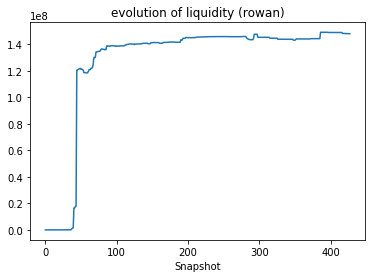

In [6]:
# evolution of liquidity
import numpy as np
import matplotlib.pyplot as plt

def elementwisesum(listoflists):
        return [sum(x) for x in zip(*listoflists)]

d = data['data']['snapshots_new'][0]['snapshot_data']
addressList = list(d)
tokenList = list(d[addressList[0]])
totalLiquidity = np.cumsum(elementwisesum([elementwisesum([d[addy][token] for token in tokenList]) for addy in addressList]))

plt.title('evolution of liquidity (rowan)')
plt.plot(totalLiquidity)
plt.xlabel('Snapshot')
plt.show()

In [7]:
constants = {'miningSeconds':121*86400, # 121 days
             'totalReward':30e6, # 30M
             'epochSeconds':200*60, # 200 minutes
             'multiplierSeconds': 121*86400, # 121 days
             'multiplierBand': [1,4],
             'isGeyser': True} 

In [8]:
def get_reward_per_snapshot(**kwargs):
    miningSeconds, totalReward, epochSeconds = kwargs['miningSeconds'], kwargs['totalReward'], kwargs['epochSeconds']
    maxSnapshotLength = int(miningSeconds/epochSeconds) # round down

    # a bodge to alleviate the inequality in reward distribution caused by sudden spike in liquidity add
    assert epochSeconds == 200*60, 'This bodge only works when epochSeconds == 200*60'
    liquidityWeightQuantized = [0,1,4,5]
    liquidityWeightSnapshotIndex = [0,40,44,71,maxSnapshotLength]
    assert len(liquidityWeightQuantized)+1 == len(liquidityWeightSnapshotIndex), 'liquidityWeightQuantized or liquidityWeightSnapshotIndex is invalid'
    rewardSnapshots = []
    for weight, lowerlim, upperlim in zip(liquidityWeightQuantized, liquidityWeightSnapshotIndex[:-1], liquidityWeightSnapshotIndex[1:]):
        rewardSnapshots.extend([weight] * (upperlim-lowerlim))
    rewardSnapshots = [r/sum(rewardSnapshots)*totalReward for r in rewardSnapshots] # normalise
    return rewardSnapshots

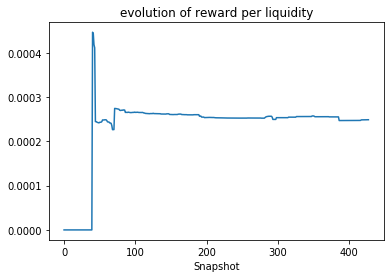

In [9]:
rewardSnapshots = get_reward_per_snapshot(**constants)[:len(totalLiquidity)]
plt.title('evolution of reward per liquidity')
plt.plot([reward/liquidity if liquidity > 0 else 0 for liquidity, reward in zip(totalLiquidity,rewardSnapshots)])
plt.xlabel('Snapshot')
plt.show()

In [10]:
numberOfEpoch = len(data['data']['snapshots_new'][0]['snapshot_data'][addressList[0]]['rowan'])
theoreticalMaxReward = constants['totalReward'] * numberOfEpoch * constants['epochSeconds'] / constants['miningSeconds']

In [11]:
print(f'Theoretical reward ceiling: {theoreticalMaxReward:.0f} rowan')
print(f'Actual reward to be distributed: {globalReward:.0f} rowan')
print(f'{globalReward/theoreticalMaxReward*100:.2f}%') # must NOT be larger than 100%

Theoretical reward ceiling: 14861111 rowan
Actual reward to be distributed: 7690790 rowan
51.75%


## demonstration - VS

In [2]:
ingoredAddressList = ['sif1vktf7skpeyc3mq8fdg59nyyg57a053p9n3l5dl',
                      'sif1cvqeau8z7um5vnl78ueqyvfl26jcjpunmejdyz',
                      'sif1fy8xewt2xkyrnym2x36qfzwrtqf3z40cdzxgxz',
                      'sif1kxyjwd9clrnntuxdrtejwdrgvatarftzp8d8ps',
                      'sif1gaej9rvg99xnn8zecznj2vf2tnf87gx60hdkja',
                      'sif12ffxzle0x5093ysnpatrjy7rsduj2u2v4zygh9',
                      'sif165f2082xga5a3chux9lcf97ty9fa9jfdwes5cz',
                      'sif1reedn7lzr06smmckgn52mpppca3aeprasfvcf5']

In [3]:
filename = 'data_v.json'

In [4]:
# pull data
import json
with open(filename, 'r') as f:
    data = json.load(f)
del json
addressList = list(data['data']['snapshots_validators'][0]['snapshot_data'])
globalReward = 0

In [5]:
# import the blackbox function
from utils import getUserAccReward

```getUserAccReward(data, address, isValidator=True, hasPoolBalance)```<br>
**returns:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;claimable: reward already set aside for the user, ready to be claimed any time (in ROWAN)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;accumulated: user's accumulated *unclaimed* reward (in ROWAN)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;currentMultiplier: user's current multiplier

In [6]:
print(f'{"Address":<48}{"Claimable":<16}{"Accumulated":<15}{"Multiplier":<0}')
for address in set(addressList)-set(ingoredAddressList):
    claimable, accumulated, currentMultiplier = getUserAccReward(data, address, isValidator=True)
    print(f'{address}: {claimable:>10.2f} rowan, {accumulated:>10.2f} rowan, {currentMultiplier:.2f}x')
    globalReward += claimable + accumulated

Address                                         Claimable       Accumulated    Multiplier
sif1a2dq5eheeufvfyx020sljul8cyp5u20jqcpsc7:       0.00 rowan,       5.21 rowan, 1.20x
sif1djjzf28ds5xa69dkyg0muu8emgpf4tnfqzjwh2:       0.00 rowan,      52.66 rowan, 1.54x
sif1x2q37tl286mryd0pzzwy8x79wq3tzfut750zxv:       0.00 rowan,    7207.68 rowan, 2.17x
sif1zev7rnlkla2m0ey5q73yzuz6al3vxft6gfvdg3:       0.00 rowan,     147.29 rowan, 1.24x
sif1hn5lw538tvdvmn3afs3s2k4ws22jc0ftgvrw6e:     135.83 rowan,    3867.30 rowan, 2.01x
sif1slr2aa0gpgfudq8dfevsq0yjve5l3zpem6m2lm:       0.00 rowan,     358.71 rowan, 1.83x
sif1yut8qdz4s8xncn2jawgqxj37hflqxyk29rhzs7:    1235.75 rowan,     691.65 rowan, 1.41x
sif1emqn6c5040dvehhvwm88hkzy398zrw32a8dunx:       0.00 rowan,      48.58 rowan, 1.48x
sif18n457xc0rv8vysepwd0c835l7yfj3m67xd0ngy:       0.00 rowan,      16.45 rowan, 2.29x
sif1jl2tgk0zc87st8jakcwnjt0lm3dge63st5lu7m:       0.00 rowan,       9.84 rowan, 1.24x
sif12z7tx29u24f3eyz4gck5grv5ge623jxtt2ea20:       

sif1hjrdm5aqhl4n6xxmnzt2v2zjazfx4enkqd0wcs:       0.00 rowan,   24396.60 rowan, 2.05x
sif1nk64jqfdcqxzwukqfkt9j2r4xx893x6s29errq:       0.00 rowan,       0.81 rowan, 2.28x
sif1pvhehsv29ry0llc6pcu579gcq52ptpsd22pcf8:       0.00 rowan,       5.94 rowan, 1.15x
sif1732kcuf53qahat6tmkp4a6vtrvf49xyl9a002t:       0.00 rowan,       0.55 rowan, 2.16x
sif14x7rju273vxasp4g7f057t4lua7wzmugm2dxyu:       3.17 rowan,       0.27 rowan, 1.83x
sif1ffdm4vkykqkeckr8ehc20he42nhcawkx7dnhu3:       0.00 rowan,      32.34 rowan, 1.22x
sif13lvlfy4pxp6wmrew3v37hdrjq0hpecangkskx2:       0.00 rowan,     459.76 rowan, 1.62x
sif1y27g66lqn57x27q0gtxpr22f57w4sx057l9eu9:     917.44 rowan,     519.04 rowan, 1.37x
sif18f80rgwwvzqxtt4whj3jn672f253tcuswn532a:       0.00 rowan,    5010.25 rowan, 2.20x
sif14gndet3zmzrdk4u4rxh2ea2c09huvlyjts2s2c:       6.66 rowan,       0.00 rowan, 0.00x
sif1tekzuv8vm9t249jynv2rp84y0wtfrnuxpmkz0j:     237.36 rowan,       0.00 rowan, 0.00x
sif1vgclny8s2gaj30vhcdqxg0ycwr64vq6gdv7emf:       0.00

sif19k3g06cnfsv553rgw7za8zwzz2lwff0tp4sxaf:       0.00 rowan,     164.24 rowan, 1.80x
sif1leuy2a2jsw330c7re7hdx5v7ftk3nk8knafh3t:    1983.51 rowan,      26.39 rowan, 1.22x
sif1ff2tawtn2ppam3p70w367uxf424ermtsdv2ygg:    8520.06 rowan,     203.86 rowan, 1.06x
sif1suezkuuadq0v89gs8ndp7zs823zwc5r8rq30h2:       0.00 rowan,     823.05 rowan, 2.11x
sif19qkzczuudete6deaylwjhydfw2ng76tf5yq8hs:      77.26 rowan,      30.47 rowan, 1.96x
sif1j7l0wn6w2xwn58ah3qxlacdnj4j0wj5amr3djs:       0.00 rowan,      29.01 rowan, 1.64x
sif1tjy27xl55a7j6atccuh3fadlwgjxrgke38rzqv:     596.87 rowan,       0.00 rowan, 0.00x
sif15fw39pn3p39w5l96hxmsh22qwrtv2jzufytwqp:       0.00 rowan,    1301.01 rowan, 1.91x
sif187ehmh522lrljd040y2aqka2r7xu5l8z3ygup5:       0.00 rowan,    3121.14 rowan, 2.12x
sif1zkql9ltsfax98xezdcy45ja20prjpqlrpacpzw:       0.00 rowan,     309.42 rowan, 1.53x
sif1jt7revqtdegpveezewer7qdwse68r9py4m7tmf:       0.00 rowan,      30.28 rowan, 1.19x
sif1q73kadn35j3ja2vnguw3t2r95ckkg5fr2r53ep:       0.00

sif1anktmzatjcwz8upzxu98k6q9x7du3z59l72sul:    1137.90 rowan,     434.85 rowan, 1.84x
sif1w7q7l689r2mju87yn7she5q0clt04p2hpa70nt:       0.00 rowan,    1095.07 rowan, 2.01x
sif1v9mhvgnl5dgmm5ssmxd7l6h26q4l3wpjc2rnq3:       0.00 rowan,     129.27 rowan, 1.44x
sif15uzhs68a7wqjv2kgvs3s9kq94kjmssjcfh6n53:       0.00 rowan,    1563.54 rowan, 1.75x
sif1p8vwljahxu2xeuhlrts94ll5l0jsaaz3xhjsw7:       0.00 rowan,    1536.45 rowan, 2.15x
sif17eshsge49yk9m2wq6kqe2ylk6pz34jn6dj2ptk:       0.00 rowan,    1202.76 rowan, 1.96x
sif1k42j3kplqpu5gydavlggm2l0n2ddpj6e6srh4u:      52.31 rowan,     143.85 rowan, 1.94x
sif1paqp5z8eglhulezxxhmreng3p6a9hs735e8ras:       0.00 rowan,    4119.64 rowan, 2.11x
sif182nre8smny89fa80n4jf538ltl8kn7q6440lmp:       0.00 rowan,    1888.24 rowan, 2.16x
sif1jj8qpe84dwnckjlqevs78uszvc3zzleh7z47vn:       0.00 rowan,      61.29 rowan, 1.42x
sif104vpse5sf5jrcyrv0crg3yvmjpnvjzzxwsaudk:       0.00 rowan,   15727.07 rowan, 2.15x
sif1d7a4vcrayrmc37p8tk8p8w9yvhpsgt5ky744gm:       0.00

sif1mzu24s49htv9l4jcfq9lm5pv4q69wy5jn424np:       0.00 rowan,   31998.31 rowan, 2.24x
sif1xu4vzq76q4hg5kdkav5upqg9wya8vtjtjw99hr:       0.00 rowan,    1320.78 rowan, 2.23x
sif15nlwad2sduj326t809wnxxvgrg78x3gzdvd58x:   27574.12 rowan,   23122.33 rowan, 1.49x
sif1hphafvqan46fywkhnq486g5l6ewywcev8r657p:       0.00 rowan,       4.38 rowan, 1.11x
sif1hwh39hr29qj889swpnspuawkmkv89u8jg7ev4h:       0.00 rowan,    1271.89 rowan, 1.78x
sif1ta2yj7yee373evu8xy73gludh8psy55r662jq7:       0.00 rowan,       5.27 rowan, 2.36x
sif1scszxzwj0juqv2q8ry4ugvvzaps6ulmlcx8u5r:       0.00 rowan,      64.01 rowan, 1.26x
sif1jxfjp0xhwkq08kxg7nrnfw6ququ5n3f3f72um0:       0.00 rowan,      12.62 rowan, 1.37x
sif1vjrx0lks65yefnsz4xk92vugda2z25espxmjw2:       0.00 rowan,  283835.57 rowan, 2.24x
sif1mujlh3jwhdduz4m9gk3tan6fg7sp87l3a4req5:       3.74 rowan,       0.00 rowan, 0.00x
sif16862syzdtc6h0sxz92jhnjjas5yhhjgz22ztlp:       0.00 rowan,       1.13 rowan, 2.38x
sif19qc25l2nwztml9nvhqpg7y55420uvg59ppvr98:       0.00

sif1snw4x9es77j6uyupx2u4e0xhjf0ajmkrmrn7xa:       0.00 rowan,    3087.13 rowan, 2.15x
sif1l8rpde0wy6v6rv53cjx9pxx2hmtuvzrqa3n7r0:       4.76 rowan,      20.60 rowan, 1.98x
sif1re5k8jee6td9p0uf7z4xmunfyvmeptneq6tqtf:       0.00 rowan,    1909.59 rowan, 1.82x
sif1xh6wssldtq7u9kpu9ekwnkrmawxwtp3awy3x6w:       0.00 rowan,       0.44 rowan, 1.76x
sif1c3tz9hd5fnc4hs5fevwgu8k49gzkjut4pym8fd:    4616.41 rowan,       7.61 rowan, 1.10x
sif1dj84qy3azme7u7tcvm44kkhxt8pdqx5374deqh:       0.00 rowan,     261.57 rowan, 2.23x
sif16fnapc7xsrkmv4sqazzmmf0wdv74hjnz5x63m6:       0.00 rowan,       7.17 rowan, 1.27x
sif1s024nwnpcrqp4v277tj74fzr8cwwgmh588mlwj:       0.00 rowan,      14.39 rowan, 1.73x
sif1lsyday99g0l6lmjkmznzmqzaep0nnzfsjzx8dw:      12.09 rowan,     280.40 rowan, 1.51x
sif1d7shlwvtu42hg68v9ywlcqsvu6x0xhxjztpnzn:       0.00 rowan,    1003.02 rowan, 1.55x
sif1q3ghhlw82tvu8u04gyxrd2hjkcvxgehjnkvm8k:       0.00 rowan,      62.28 rowan, 2.05x
sif1p03h4rh6ld83g5qj076ze3uft2wzv7ugmrvzxv:       0.00

sif1z98eg2ztdp2glyla62629nrlvczg8s7f2k58zd:       0.00 rowan,       3.62 rowan, 2.02x
sif1vvqpcfx4yj4kg8kgl2rcpyxyjj0xcqljt9fh6m:    7744.52 rowan,       0.00 rowan, 0.00x
sif1qa6lc59tf3vwz83k8vv9mx2zqucksn95jj5qsm:       0.00 rowan,     349.53 rowan, 1.31x
sif1uyumpluec98zcdz5s9ml0wv3tzpffl44ww0wmu:       0.00 rowan,      18.32 rowan, 1.26x
sif128ke5y0sfmc3fr0w755aycu779er8crjyvafew:       0.00 rowan,       0.00 rowan, 0.00x
sif10twgpy3un8w98l0qafj9900ennxhn7smgn03c3:      52.95 rowan,    9678.04 rowan, 2.15x
sif14qhh07j85vy5kc0ynvc805dgqexutt7sdyxc8a:     293.05 rowan,      10.13 rowan, 1.81x
sif1xa0gar9ezpxaaj0gql2s9jckkftdk0r45nesss:       0.00 rowan,       9.02 rowan, 1.28x
sif10wvmf9nv6q4tdhr050e4hspetytawuel2lapq4:       0.00 rowan,       0.62 rowan, 1.06x
sif1tee9lxg8rcm7tl49dvefnnen9prkezvjulsysf:       0.00 rowan,     364.37 rowan, 1.84x
sif122wrd60h4g0sen88e74al30dv0ef8ju26lug9x:       0.00 rowan,       2.12 rowan, 2.37x
sif1cazd8eugkyd5hsd9xf9gpxx20t4767cjhp4vwu:      26.75

sif139jt0n5vllmte8s8lq86sw29958mlpxdu0umul:       0.00 rowan,       0.41 rowan, 1.08x
sif1tnasd2ucd22jgl8ermkkhder6h8y3yftea29wu:       0.00 rowan,    1467.36 rowan, 2.22x
sif1nvyqrve35fpzgrewnaxmyxsqtaq4dxvyrstvht:       0.00 rowan,    2208.89 rowan, 2.01x
sif18kqsmvelhz59509lcgevkt80vqpfxvc0pmpwqs:       2.30 rowan,       0.00 rowan, 0.00x
sif1r0mjrsjfprau9rwwxe04hkzfud696n3x987rd8:       6.58 rowan,       0.00 rowan, 0.00x
sif1n86q4fn7vmpn70c5n6m4f7pr8m5vczrds4v53k:       0.00 rowan,       6.96 rowan, 1.10x
sif1cpw23sspqzlygzqz85hnewua8d3n2ugjrz7phc:       0.00 rowan,       0.00 rowan, 0.00x
sif1eswdrqx8ndefhkw7clqewy3mdjg3ux8l0jxse4:       0.00 rowan,    1747.69 rowan, 2.33x
sif1naateuyjvgxtrjsx00utvf4zcm65q40mygvrr7:      14.52 rowan,    2330.19 rowan, 1.80x
sif15aelqnkk22rm29juqghjyfztv3wsvayhkrw4yl:       0.00 rowan,      10.04 rowan, 1.13x
sif14tnl7nygu3zqe4yvxklmfaqa580a2a7qzu5vad:    3188.96 rowan,       0.00 rowan, 0.00x
sif18nlustj5c5jrjgu0l68kxuqcln89qdmgv23yug:       0.00

sif14weep9sq44889kvw29vc0y8cy6p333v2nj3tdz:       1.63 rowan,       0.00 rowan, 0.00x
sif1xge8tdw4a8xa6kn75rn5klssqj23judth079c4:       0.00 rowan,       0.92 rowan, 2.32x
sif1vyvqgxpzkjps4cwv6ymg0nswed3wgcq3r0l79t:       0.00 rowan,    4380.56 rowan, 2.14x
sif1qq2tdw7y7ucu5spllp8gp0knclyjsphn6c864k:       0.00 rowan,      17.75 rowan, 1.31x
sif127mw8mmfnkv6kdl9reqljnzf7pjgjgh0mr56py:       0.00 rowan,     178.50 rowan, 1.90x
sif186x6qse5z495fggp7wh0pe5anvkda0warj6x6h:       0.00 rowan,       3.00 rowan, 1.05x
sif1vuypyrjq2vymnedvwfc2rlhvx78k9q4aux2sc0:       0.00 rowan,     133.71 rowan, 2.23x
sif1x2f9gx89p55pkptmp7563wkj7lewdqjjefa7sg:       0.00 rowan,       6.35 rowan, 1.31x
sif1zdkqkt3lfmavpvppfz5tvjqkq04jghj8clewz8:       0.00 rowan,      12.29 rowan, 1.27x
sif1jqpl37rn8xv63apsw47u05evp9g9p34gnlrlz3:       0.00 rowan,    2341.34 rowan, 2.25x
sif18ce2at0rcsn8h8qpkw3d470fetk008eeptpssj:       0.00 rowan,      35.25 rowan, 1.33x
sif1h2rt26q3vdz05azdtl08qqal2zgep6000cfcfn:       0.00

sif19qd79crvenpan973gar6cn2r0gdhemrvvkjd0r:       0.00 rowan,     111.37 rowan, 1.30x
sif1es8agrrcqlur9xxlydrmwu69y3sctpzxydqw3a:       0.00 rowan,      18.95 rowan, 1.28x
sif17vt5ct63kp855sd7ar3he0rhu0cujhz3ketvgw:     192.14 rowan,     210.64 rowan, 1.33x
sif13p7dw2my5904cgxa7pr8fhpdq3uhwkzuv2js5p:       0.00 rowan,      74.53 rowan, 2.07x
sif1lnxk4yzc5qk9fnrzk03lfhjgr7ugz4aat3tdrv:       0.00 rowan,     130.31 rowan, 1.15x
sif1ur4u8qsndz0zk0slc93rem7nn9g3te6wwtf3nj:    1609.79 rowan,       0.00 rowan, 0.00x
sif1gn6gy0t9k6n4dtdevg7ggssjcfzgj0rfkgey95:       0.00 rowan,     670.88 rowan, 1.83x
sif1zkrj8mp9ul8x8ld7hasak74an5hxgzm35t59fp:       0.00 rowan,       0.07 rowan, 1.09x
sif1l7sud0ser8yqvjau63ltr8yadk46p0j3tqcx7y:       0.00 rowan,   12452.46 rowan, 2.20x
sif1er9q90drx0dysk8nhrw20sj50vcqrey9f5jgnt:       6.07 rowan,       0.00 rowan, 0.00x
sif1y2ptynyf78vjl7agjj7e7x9t2k3gwgv5kadnf7:       0.00 rowan,     197.63 rowan, 2.13x
sif14tm9600fx088jw55gypcwkwh04j34e9jp68t8r:       0.00

sif1ycvcu3wwkhfs0sjgu5lx35weferrha8sdwsse5:       0.00 rowan,      69.80 rowan, 1.47x
sif1l5f36fxx0eg2klle2jpcw0fvhchhuuasrl83yk:       0.00 rowan,      22.25 rowan, 1.26x
sif1pt58gdnds7acq6qcy58ujzlr9g5zkn9f02lsn2:       0.00 rowan,       5.80 rowan, 1.25x
sif18ljgxe8kv4pwdxe8em7a0w68ufp3kwt3enkjla:       0.00 rowan,      31.43 rowan, 1.28x
sif1d7vvatc4rqwqf99z90rqf6dlc484p02qjsv2h9:       0.00 rowan,    1103.74 rowan, 2.37x
sif1j43jf5xcmkr27qymae2lkju7rxf5hlh75rayq2:       0.00 rowan,     181.88 rowan, 1.83x
sif16zfeaqt8sjfrz027p5ysdjag44gtchusrwf0tf:       0.00 rowan,     619.18 rowan, 1.80x
sif19yte04utd5nrtewrk3v26cds0kjnrh558vkasq:       0.00 rowan,      39.53 rowan, 1.22x
sif18sn2av2zs9qqyksm5wxe5g4adcdm492nm92l5e:       0.00 rowan,     100.64 rowan, 1.43x
sif1a5yk8cu3m58ml0cn8awx83hx66yvkx3nmc4mh6:       0.00 rowan,      24.55 rowan, 1.25x
sif1esq08388phznkerfhg2ce26f66yj3s5srddstt:       0.00 rowan,    1002.08 rowan, 2.23x
sif17aznmpghekl9hqlew82wxsuu2fzwrr6s8322zx:       0.00

sif1q8vk0gzqv3edqrqsxdfe4rcgafz6m8g4nlv5ys:       0.00 rowan,    1544.61 rowan, 2.03x
sif1yxhjnc3u2avecdqwj63n4xeymg958aus26jvhj:       0.00 rowan,      11.72 rowan, 1.82x
sif1qdxz982svr4xd8fdw73lc0glzg0y044uq6wctc:       0.00 rowan,      91.10 rowan, 1.44x
sif10ujvltcky6sdjnvuvqexqflacysywalrffs6kz:       0.00 rowan,      38.11 rowan, 1.18x
sif1x6zu80twy0reu0yyj74cqlmtpqxhu7qk4rcrlf:       0.00 rowan,      66.77 rowan, 1.23x
sif1fg2awaq5hz07af23502pg6rt57ynvlp8hgf4em:       0.00 rowan,   15640.54 rowan, 2.05x
sif1xlpqp4q2s3qj0wggzjwq3kw8nzsjs24c8s76gu:       0.00 rowan,   35583.88 rowan, 2.06x
sif1y3lzn2ruswu67efy83et2vp77rhshp2lryzpfr:       0.00 rowan,       1.21 rowan, 1.06x
sif1vuwy553khm9jxmugh8kfscwqr7w4v86zgd92h7:       0.00 rowan,   23794.17 rowan, 2.18x
sif10nxjcs6lqtedrhgpgd9m5qlltttsg43u82wpvh:   11231.59 rowan,      25.16 rowan, 1.20x
sif1vudrj77rpv6gpqlls85u22qtmcyqgfd82kx80e:       0.00 rowan,    1933.83 rowan, 2.15x
sif1tpwtwxtwjs923e9u2tgt4nxx363svfuhe4k2fy:       0.00

sif1h9qytw06hq0ffxw8ktdvy7gq2l9m628l8n095p:       0.00 rowan,       0.04 rowan, 1.03x
sif197fjp3hyfd94yeh3887jl6v5l5gwh4p0sfsf4j:       0.00 rowan,     947.94 rowan, 2.21x
sif1r3ljzpg64gtajzl7v7tynfsnqm8gkza8r63zrp:       0.00 rowan,      11.91 rowan, 1.93x
sif1kd4gyxfhpv4p8ryfe7d883xasfhfajjzm4t2pk:       0.00 rowan,       7.32 rowan, 1.19x
sif1vv6hruquzpty4xpks9znkw8gys5x4nsn9n2l6a:       0.00 rowan,       1.13 rowan, 2.38x
sif188y6symypmsh6g5jq9furflhhdmve899jqw064:       0.00 rowan,     951.47 rowan, 1.87x
sif1h0e6mgxluj26zn5vt2s7dwv7zf7978g0w4qrum:       0.00 rowan,       1.58 rowan, 1.16x
sif1pwn3y6zvrz8m5jnphfgsk5el6ldfv9lezdslqj:       0.07 rowan,      45.99 rowan, 2.20x
sif185w93543qlssfgp9yvvffsya5yl6evlrmzzpw3:      79.72 rowan,       0.00 rowan, 0.00x
sif15mv63d6qzrr28rapg2k6fzala7kt4pa2h9u88u:       0.42 rowan,       0.00 rowan, 0.00x
sif1pxqfjs3slc5jefq25zpjf3jmd3pfvm0tqmulhl:       0.00 rowan,     482.25 rowan, 2.17x
sif1myqxqj6quxat23g3mgnxcrjt7p2pg9lxkpt45c:     243.35

sif1wfsd4jz8nmd8w0lyrgkcp3fer3k2j73u6m8p3d:       0.00 rowan,     321.27 rowan, 1.81x
sif1jsrpcds0fkf20gj22qgvwtasqy6lw60flmdm8h:      13.05 rowan,       5.36 rowan, 1.92x
sif1ckw7yqyw8kk7rx3tzmr4m033xrxsk960fuggcg:       0.00 rowan,      12.54 rowan, 1.07x
sif1kvaq45a60j9xz7w90w7h8hqjtys65yd77w830v:       0.00 rowan,       8.85 rowan, 1.24x
sif1vunhupqyv25z4av8ndyhnqeakgwggpkc7g5xau:       0.00 rowan,     267.04 rowan, 1.47x
sif17sxdcufjhv0axcq36h2ndwzskmp77sr8rycr0h:       0.00 rowan,     460.10 rowan, 1.78x
sif1srg2gwe4vw0m2jqwm672xz9uadnky05g87z0h0:       0.00 rowan,       0.14 rowan, 1.73x
sif16s3rg9cayn8fz9ks6k6f4umn7d7y9uue3rcgs3:     377.03 rowan,       4.75 rowan, 1.38x
sif13rhfyxf2n45ym3xgu9xfx49es8s0th5hlrcd83:       0.00 rowan,      78.29 rowan, 1.53x
sif1rraawlgetfn4v2yeywdzmjrawf64t2w7uvdell:       0.00 rowan,    5847.05 rowan, 2.15x
sif1hy9cgqnnssgq060hzl8zd7v8wavhx3halfh42r:       0.00 rowan,    2763.83 rowan, 2.27x
sif1f6r2c4afn7zrf2ghrzqvctk2lkfvmf2vjeekt6:     468.28

sif1cpp9a9te0hnsq9c9gzpv225l0dy48gutsrkpdz:       0.00 rowan,     264.50 rowan, 2.20x
sif1s6upa5qhcxc8k5ksh89kgkgzpzkh405f9g9e2w:       0.00 rowan,     351.17 rowan, 2.01x
sif1dvg008eyadpunkp7p363ehqszn9cnkyqrxygge:     114.49 rowan,     372.88 rowan, 1.51x
sif1rkpdlluj6a7ksz5jk7zxu8zlurd9hkm4jm9hym:       0.00 rowan,       1.96 rowan, 1.21x
sif1l60wqxmrrwxtk5akvsguhazyhjd8prkpuspk82:       0.00 rowan,    6480.45 rowan, 1.85x
sif1x2rly83ww25rgxc5pr8hxrtdma369e5asjj76x:       0.00 rowan,       2.02 rowan, 1.18x
sif159q2frutlt6pcvy9l302uedwvn9jrmngud97fd:       0.00 rowan,    5225.21 rowan, 2.16x
sif1wdv7fp49uvrudh3qvx0trywgp2y9l8tpgwyr2v:       0.00 rowan,     643.93 rowan, 1.85x
sif1ca037d9vatcsc7esa4kk2pus9ycuszwz9pu9zp:       0.00 rowan,     827.38 rowan, 1.90x
sif1n79369uhv7lkjs8g0t0m9g6yla7uam97lhmg4w:       0.00 rowan,     147.51 rowan, 1.74x
sif16m2xnrc0wdpsdsehlajpxcufqhdpskahw4nyca:       0.00 rowan,     234.05 rowan, 1.49x
sif1xlf6tcp4qqc5h0zzf36jyckrlld9eh7pj4yn3j:      72.37

sif1dazzwwvmlnwws3uc3dna0a37vu0zgycymzh2jf:       0.00 rowan,    3102.60 rowan, 2.08x
sif1s8vsdkqv275zsafv5qz46qmg9952m39p85hyhk:       0.00 rowan,     458.71 rowan, 2.33x
sif1a5f6qzt25j36st3s5gdcdhku3ktczehedal3s8:       0.00 rowan,      77.28 rowan, 1.54x
sif1yuy5lz22lx8lvt6gn9fxrczj5g2s5z6aey8vhu:       0.00 rowan,      12.00 rowan, 1.14x
sif1mxk8ne426729eqt04fg4xd43yd2fj20gttykxa:     135.05 rowan,      68.71 rowan, 1.45x
sif13e6svcf0dy58ee6z7s8d5jjmt92jz67kx3et79:     383.24 rowan,       0.00 rowan, 0.00x
sif1fn29vay0a40jae72jxkfslfgtjwldqdk7kehlp:       0.00 rowan,     624.19 rowan, 1.72x
sif1425w0pqau9ndery8wqvn35elfsz89475h64fyy:       0.00 rowan,      49.10 rowan, 1.59x
sif1tpr36xw5etr3fhjafrhyqtrq9wrgpqsr6hn8e5:       0.00 rowan,     178.84 rowan, 1.80x
sif1vjz6ptrmavxddp0lz9wyc2xh0r3pw5hnkt8qvs:       0.00 rowan,       4.70 rowan, 1.03x
sif1x6j6lrkj48s0haka55d6kpaupmt3tfrhuzwqch:       0.00 rowan,       9.79 rowan, 1.48x
sif1t0n807qfscmntgetzjmnrfy6axcm3dlcvjcqe6:       0.00

## validation - VS

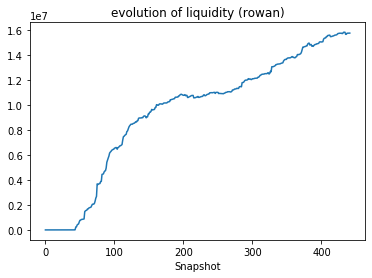

In [7]:
# evolution of liquidity
import numpy as np
import matplotlib.pyplot as plt

def elementwisesum(listoflists):
        return [sum(x) for x in zip(*listoflists)]

d = data['data']['snapshots_validators'][0]['snapshot_data']
addressList = list(d)
tokenList = list(d[addressList[0]])
totalLiquidity = np.cumsum(elementwisesum([elementwisesum([d[addy][token] for token in tokenList]) for addy in set(addressList)-set(ingoredAddressList)]))

plt.title('evolution of liquidity (rowan)')
plt.plot(totalLiquidity)
plt.xlabel('Snapshot')
plt.show()

In [8]:
constants = {'miningSeconds':121*86400, # 121 days
             'totalReward':30e6, # 30M
             'epochSeconds':200*60, # 200 minutes
             'multiplierSeconds': 121*86400, # 121 days
             'multiplierBand': [1,4],
             'isGeyser': True} 

In [9]:
def get_reward_per_snapshot(**kwargs):
    miningSeconds, totalReward, epochSeconds = kwargs['miningSeconds'], kwargs['totalReward'], kwargs['epochSeconds']
    maxSnapshotLength = int(miningSeconds/epochSeconds) # round down

    # a bodge to alleviate the inequality in reward distribution caused by sudden spike in liquidity add
    assert epochSeconds == 200*60, 'This bodge only works when epochSeconds == 200*60'
    liquidityWeightQuantized = [0,1,2,3,4,5]
    liquidityWeightSnapshotIndex = [0,60,88,119,270,372,maxSnapshotLength]
    assert len(liquidityWeightQuantized)+1 == len(liquidityWeightSnapshotIndex), 'liquidityWeightQuantized or liquidityWeightSnapshotIndex is invalid'
    rewardSnapshots = []
    for weight, lowerlim, upperlim in zip(liquidityWeightQuantized, liquidityWeightSnapshotIndex[:-1], liquidityWeightSnapshotIndex[1:]):
        rewardSnapshots.extend([weight] * (upperlim-lowerlim))
    rewardSnapshots = [r/sum(rewardSnapshots)*totalReward for r in rewardSnapshots] # normalise
    return rewardSnapshots

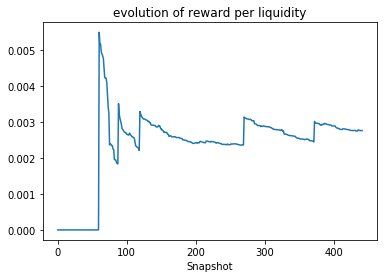

In [10]:
rewardSnapshots = get_reward_per_snapshot(**constants)[:len(totalLiquidity)]
plt.title('evolution of reward per liquidity')
plt.plot([reward/liquidity if liquidity > 0 else 0 for liquidity, reward in zip(totalLiquidity,rewardSnapshots)])
plt.xlabel('Snapshot')
plt.show()

In [11]:
numberOfEpoch = len(data['data']['snapshots_validators'][0]['snapshot_data'][addressList[0]]['rowan'])
theoreticalMaxReward = constants['totalReward'] * numberOfEpoch * constants['epochSeconds'] / constants['miningSeconds']

In [12]:
print(f'Theoretical reward ceiling: {theoreticalMaxReward:.0f} rowan')
print(f'Actual reward to be distributed: {globalReward:.0f} rowan')
print(f'{globalReward/theoreticalMaxReward*100:.2f}%') # must NOT be larger than 100%

Theoretical reward ceiling: 15220386 rowan
Actual reward to be distributed: 5893658 rowan
38.72%
